Given Task-(B)
Question-27
# HandsOn - Titanic survival prediction , from Kaggle
https://www.kaggle.com/c/titanic/data
           
Understand data, download only train.csv and test.csv 

Using Tpot, find the test score of best Estimator 
Hint:
The first and most important step in using TPOT on any data set 
is to rename the target class/response variable to 'class'.

At present, TPOT requires all the data to be in numerical format. 
Categorical:  Name, Sex, Ticket, Cabin and Embarked.
So convert categorical to number(which preprocessing?) and/or 
discard high levels of categorical completely 

Keras:
data/pima-indians-diabetes.csv, Binary classification

In [2]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
# from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
from tpot import TPOTClassifier

In [11]:
path = r".\code\data\titanic_train.csv"
train = pd.read_csv(path)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.columns
train.shape
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [24]:
#Filling null values 
# round(titanic['age'].mean(),0)
train['age'] = train['age'].fillna(round(train['age'].mean(),0))
# This column null values are filled with mode value.
train['embarked'] = train['embarked'].fillna(train['embarked'].mode())


In [26]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train['deck'] = train['cabin'].str[0]
train['deck'] = train['deck'].replace('n', np.nan)
for p_cls in [1, 2, 3]:
    common_deck = train[train['pclass'] == p_cls]['deck'].mode()[0]
    train.loc[(train['pclass'] == p_cls) & (train['deck'].isna()), 'deck'] = common_deck

In [29]:
#Renaming target - survived to class
train.rename(columns={'survived': 'class'}, inplace=True)

In [31]:
train['class'].value_counts()

class
0    549
1    342
Name: count, dtype: int64

In [41]:
X_raw = train.loc[:,['pclass','sex','age','sibsp','parch','fare','embarked','deck']]
y = train['class']
X_raw.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck'], dtype='object')

In [42]:
oe = OneHotEncoder(sparse_output = False)  
encoded_columns = oe.fit_transform(X_raw[['sex','embarked','deck']])
encoded_df = pd.DataFrame(encoded_columns, columns=oe.get_feature_names_out(['sex','embarked','deck']))
encoded_df.index = X_raw.index
X_raw = X_raw.drop(columns = ['sex','embarked','deck'])
X_raw = pd.concat([X_raw, encoded_df], axis=1)

In [43]:
scaler = StandardScaler()
X_raw[['pclass', 'age','sibsp','parch','fare']] = scaler.fit_transform(X_raw[['pclass', 'age','sibsp','parch','fare']])

In [44]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_raw,y,test_size=0.1,random_state=0)

In [45]:
y_train

815    0
877    0
193    1
523    1
634    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: class, Length: 801, dtype: int64

In [46]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)  #5 and 100 generations and population_size  atleast in real case
tpot

TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [47]:
tpot.fit(X_train,y_train) 

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   8%|███▉                                                | 23/300 [00:43<20:49,  4.51s/pipeline]

  File "C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


                                                                                                                       
Generation 1 - Current best internal CV score: 0.8327018633540373
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8339518633540373
                                                                                                                       
Generation 3 - Current best internal CV score: 0.833975155279503
                                                                                                                       
Generation 4 - Current best internal CV score: 0.833975155279503
                                                                                                                       
Generation 5 - Current best internal CV score: 0.8352018633540373
                                                                        

TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [48]:
tpot.score(X_train,y_train)

C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9013732833957553

In [49]:
tpot.score(X_test,y_test)

C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8777777777777778

In [50]:
tpot.export("tpot_titanic_pipe.py")

In [51]:
y_train_pred = tpot.predict(X_train)
confusion_matrix(y_train,y_train_pred)

C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[469,  29],
       [ 50, 253]], dtype=int64)

C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

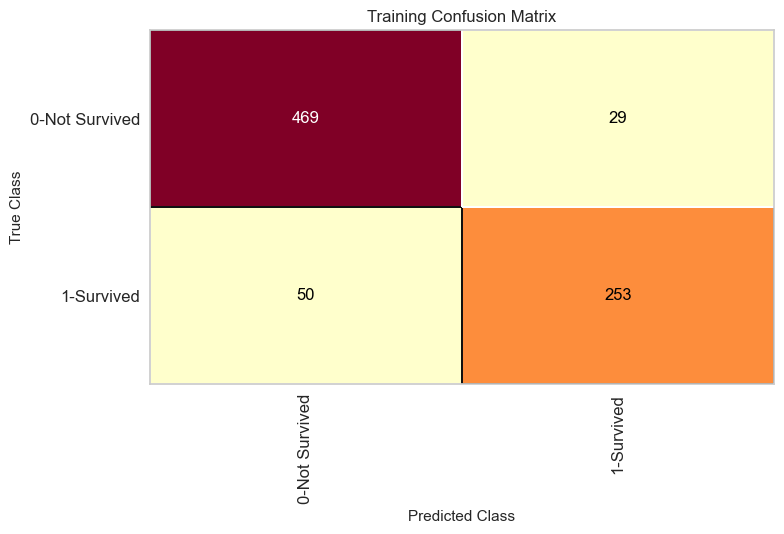

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
classes = ['0-Not Survived','1-Survived']
cm = ConfusionMatrix(tpot,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bharath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

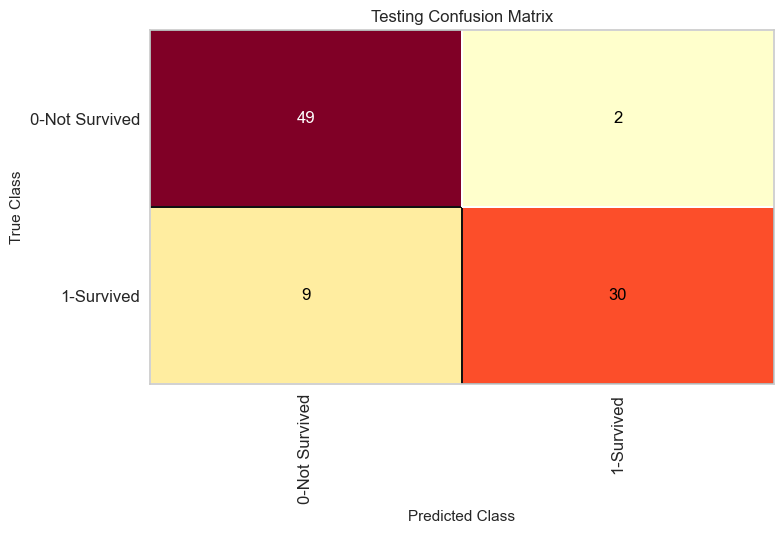

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
classes = ['0-Not Survived','1-Survived']
cm = ConfusionMatrix(tpot,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [55]:
#This was the code goiven by automl tool TPOT
%pycat tpot_titanic_pipe.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.8352018633540373
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=8, min_samples_split=5)),
    XGBClassifier(learning_rate=1.0, max_depth=3, min_child_weight=12, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosi